In [1]:
#import necessary pandas library
#%pip install numpy
#%pip install matplotlib
#%pip install pandas

In [2]:
#import kddcup dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("kddcup99_csv.csv")

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [5]:
#encode the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["protocol_type"] = le.fit_transform(df["protocol_type"])
df["service"] = le.fit_transform(df["service"])
df["flag"] = le.fit_transform(df["flag"])
df["class"] = le.fit_transform(df["label"])

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,class
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,11
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,11
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,11
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,11
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,11


In [7]:
#drop the label column and class column
df=df.drop(["label"],axis=1)
df=df.drop(["class"],axis=1)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,22,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,22,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,22,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,22,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,22,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [8]:
# use feature scaling to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.067792,0.925755,-0.104067,0.514275,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-3.451585,-1.694322,0.599394,-0.282867,-1.022080,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464
1,-0.067792,0.925755,-0.104067,0.514275,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-3.297132,-1.600018,0.599394,-0.282867,-1.146741,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464
2,-0.067792,0.925755,-0.104067,0.514275,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-3.142678,-1.505714,0.599394,-0.282867,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464
3,-0.067792,0.925755,-0.104067,0.514275,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-2.988225,-1.411410,0.599394,-0.282867,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464
4,-0.067792,0.925755,-0.104067,0.514275,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-2.833772,-1.317106,0.599394,-0.282867,-1.209071,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464


In [9]:
#run a correlation matrix to see if there are any highly correlated features
#plot a correlation matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns



In [10]:
# Compute the correlation matrix
corr = df_scaled.corr()


In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

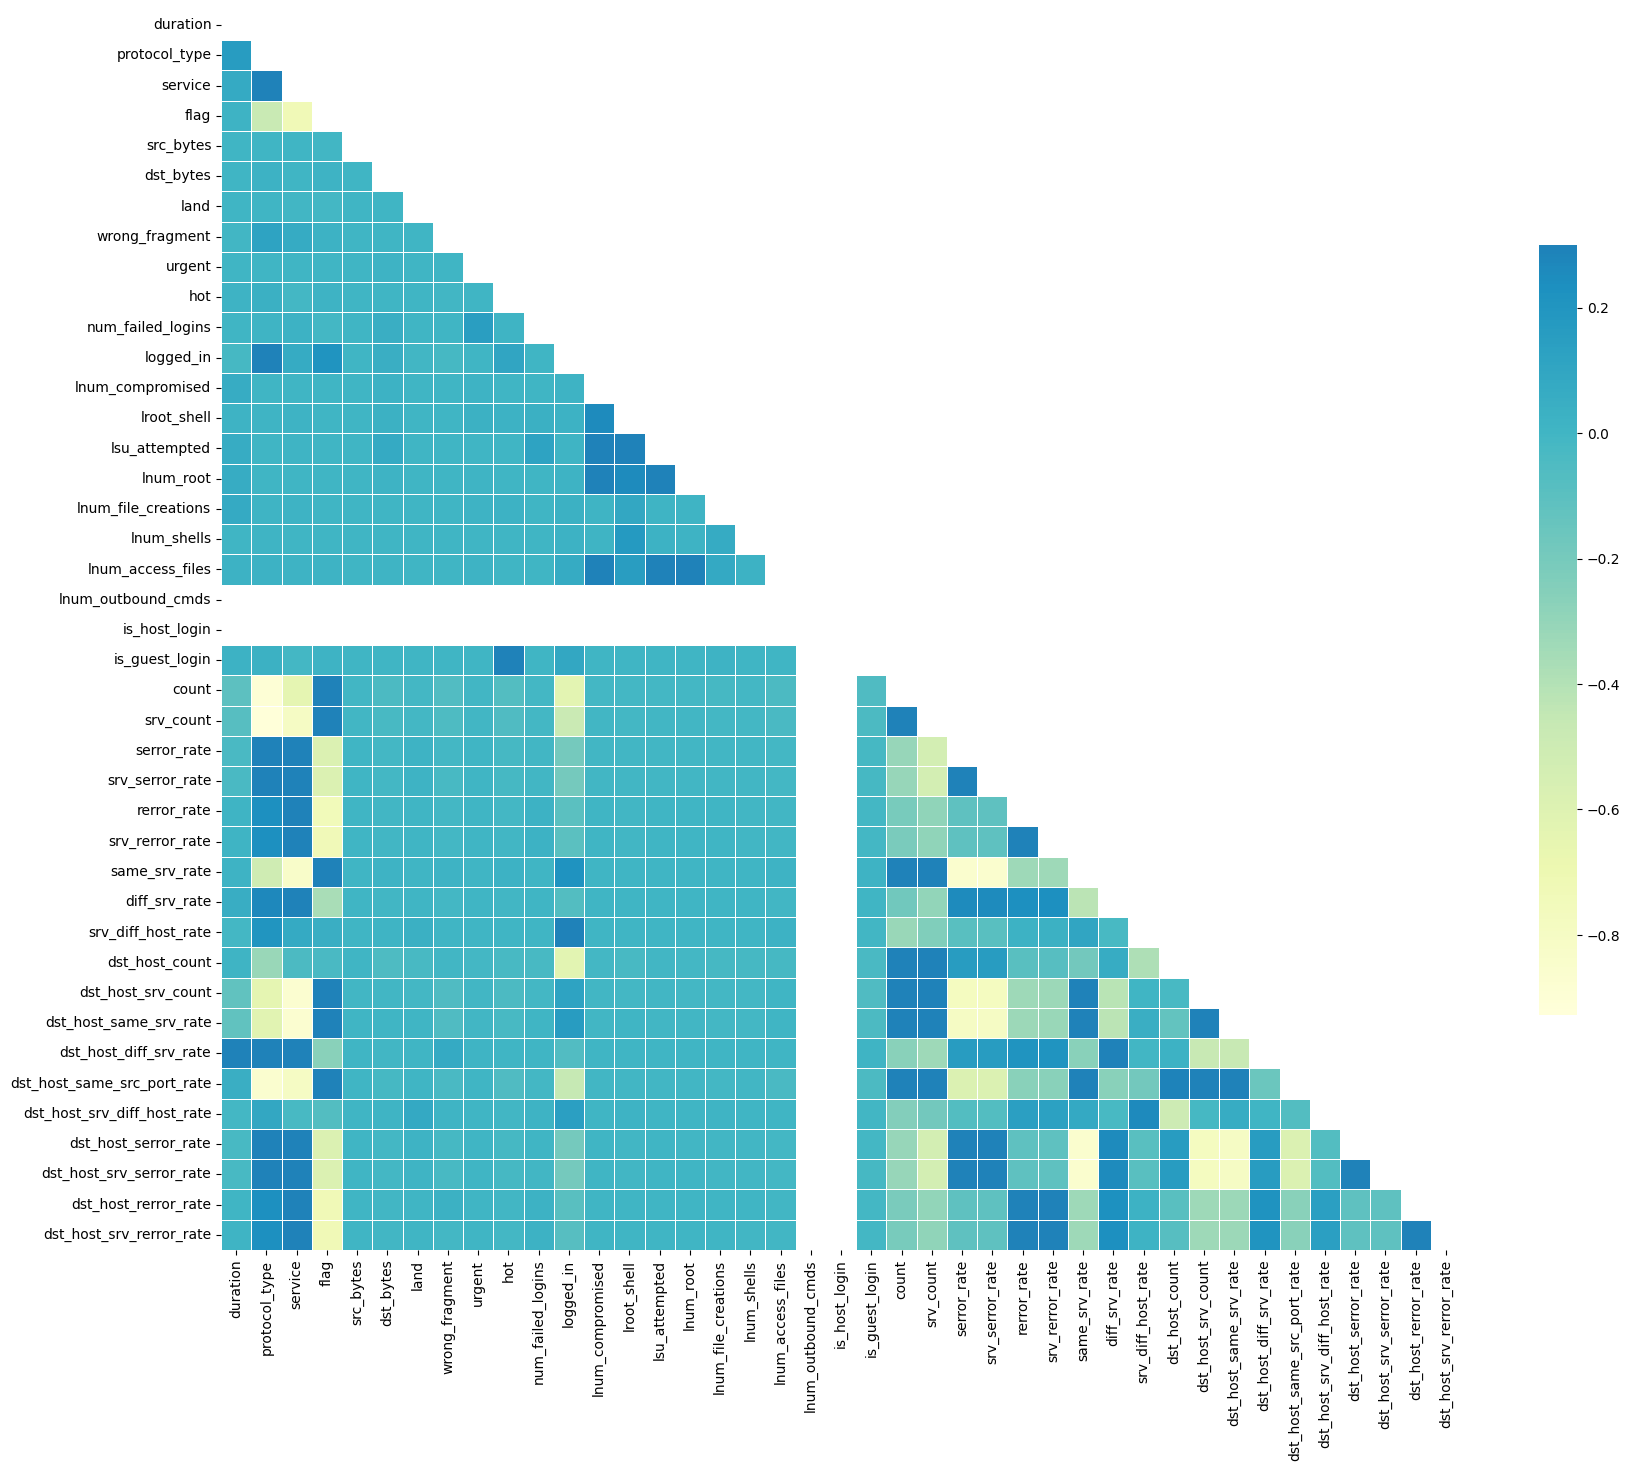

In [12]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [13]:
#print the correlation matrix
print(corr)
#loop through the correlation matrix and print out the features that are highly correlated
for i in range(len(corr)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            print(corr.columns[i], corr.columns[j], corr.iloc[i, j])

                             duration  protocol_type   service      flag  \
duration                     1.000000       0.163251  0.078995  0.019739   
protocol_type                0.163251       1.000000  0.741245 -0.476092   
service                      0.078995       0.741245  1.000000 -0.725526   
flag                         0.019739      -0.476092 -0.725526  1.000000   
src_bytes                    0.004258       0.001904 -0.001206 -0.002880   
dst_bytes                    0.005440       0.024519  0.006135  0.013191   
land                        -0.000452       0.006178 -0.002285 -0.008427   
wrong_fragment              -0.003235       0.113569  0.067200  0.024541   
urgent                       0.003786       0.002381  0.004074  0.001322   
hot                          0.013213       0.040859 -0.012767  0.021437   
num_failed_logins            0.005239       0.009056  0.023183 -0.014497   
logged_in                   -0.017265       0.386215  0.066401  0.211728   
lnum_comprom

In [14]:
#store  the highly correlated features in a list
high_corr_features = ["dst_host_srv_serror_rate", "dst_host_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "srv_serror_rate", "serror_rate", "rerror_rate", "dst_host_same_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_diff_srv_rate", "dst_host_srv_count", "dst_host_count", "srv_count", "count"]
#drop the list of highly correlated features from the dataframe
df_scaled = df_scaled.drop(high_corr_features, axis=1)

In [15]:
#display the dataframe
df_scaled.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
0,-0.067792,0.925755,-0.104067,0.514275,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-0.248632,0.536988,-0.255244,-0.20363
1,-0.067792,0.925755,-0.104067,0.514275,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-0.248632,0.536988,-0.255244,-0.20363
2,-0.067792,0.925755,-0.104067,0.514275,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-0.248632,0.536988,-0.255244,-0.20363
3,-0.067792,0.925755,-0.104067,0.514275,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-0.248632,0.536988,-0.255244,-0.20363
4,-0.067792,0.925755,-0.104067,0.514275,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.011232,-0.009919,-0.027632,0.0,0.0,-0.037263,-0.248632,0.536988,-0.255244,-0.20363


In [16]:
df_scaled.shape

(494020, 26)

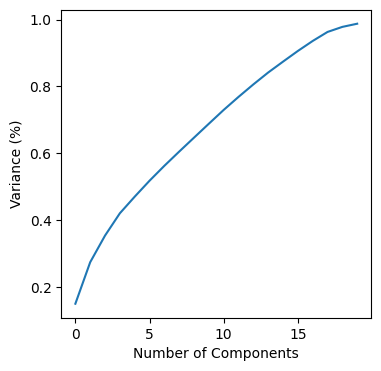

In [17]:
#use explained variance to determine the number of components to use
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(df_scaled)
plt.figure(figsize=(4, 4))
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.show()


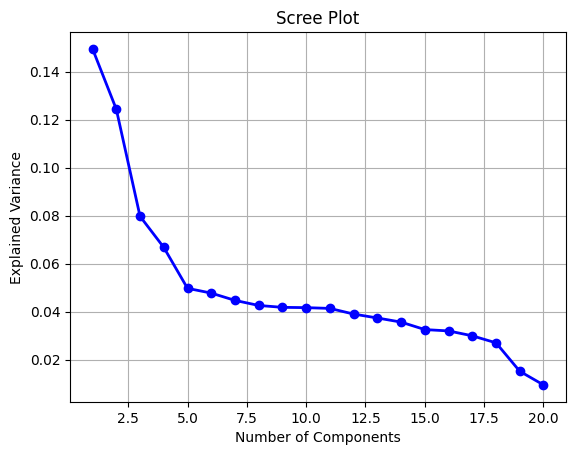

In [18]:
#plot scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()


In [19]:
# Get the explained variance ratios of the principal components
explained_variances = pca.explained_variance_ratio_

# Get the indices of the 5 principal components with the highest explained variance ratios
top_pc_indices = np.argsort(explained_variances)[-5:]

# Get the 5 principal components with the highest explained variance ratios
top_pcs = pca.components_[top_pc_indices]

# Transform the scaled data using the 5 principal components
X_pca = pca.transform(df_scaled)[:, top_pc_indices]

In [20]:
# Create a DataFrame with the 5 principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Print the first 5 rows of the DataFrame
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5
0 -0.114202 -1.808220  0.959555  0.100629 -0.434847
1 -0.139164 -1.797940  0.955273  0.094844 -0.434620
2 -0.134885 -1.799702  0.956007  0.095836 -0.434659
3 -0.134885 -1.799702  0.956007  0.095836 -0.434659
4 -0.131390 -1.801142  0.956607  0.096646 -0.434691


In [21]:
print (df_pca.shape)

(494020, 5)


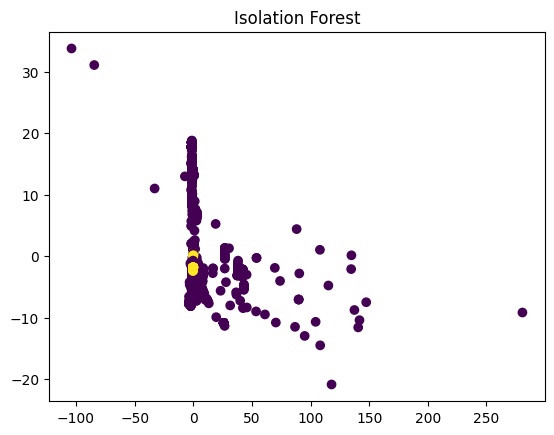

In [27]:
#train an isolation forest model on the data
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(df_pca)
#predict the outliers
y_pred_train = clf.predict(df_pca)

#plot the outliers
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=y_pred_train)
plt.title("Isolation Forest")
plt.show()


In [28]:
# Print the unique values and their counts in the y_pred_train array
unique_values, value_counts = np.unique(y_pred_train, return_counts=True)
print('Unique values:', unique_values)
print('Value counts:', value_counts)

Unique values: [-1  1]
Value counts: [ 74562 419458]


/home/nadia/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


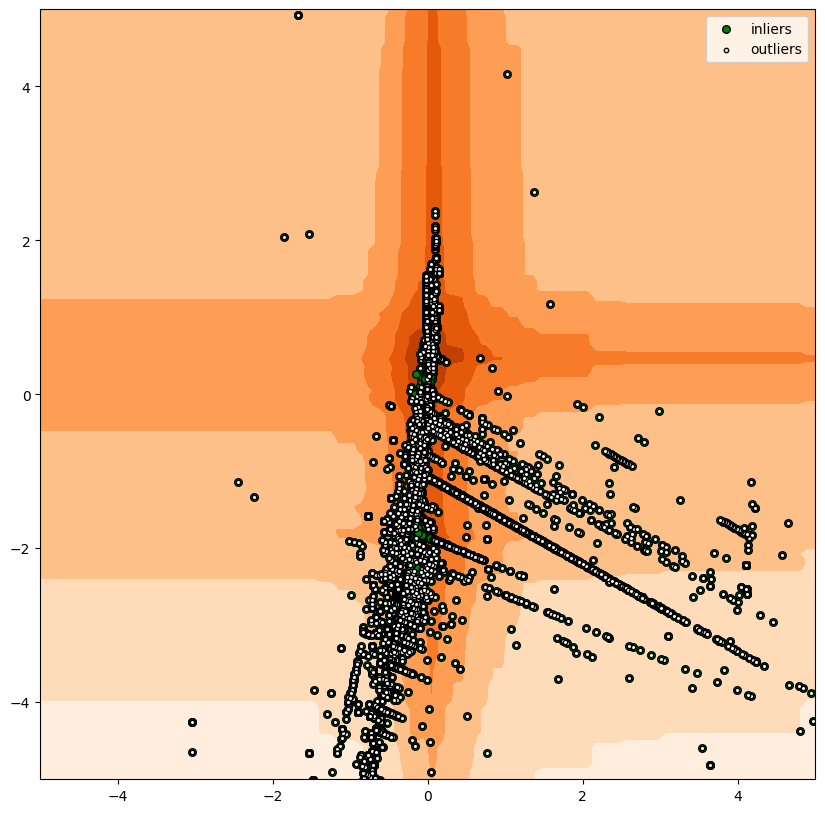

In [40]:
# Create a meshgrid of the feature values
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Compute the anomaly scores for the meshgrid using the first two components
Z = -clf.decision_function(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)])
Z = Z.reshape(xx.shape)

# Create a contour plot of the anomaly scores
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, Z, cmap=plt.cm.Oranges_r)
# Plot the inliers and outliers
a = ax.scatter(X_pca[:, 0], X_pca[:, 1], c='green', s=30, edgecolor='k')
b = ax.scatter(X_pca[y_pred_train == -1, 0], X_pca[y_pred_train == -1, 1], c='white', s=10, edgecolor='k')
ax.axis('tight')
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.legend([a, b], ['inliers', 'outliers'])
plt.show()

In [47]:
# Create a meshgrid of the feature values
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Transform the meshgrid using the same PCA object that was fit on the original data
meshgrid_pca = pca.transform(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)])

# Keep only the first two principal components
meshgrid_pca = meshgrid_pca[:, :2]

# Compute the anomaly scores for the meshgrid using the first two principal components
Z = -clf.decision_function(meshgrid_pca)
Z = Z.reshape(xx.shape)

# Create a contour plot of the anomaly scores
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# Plot the inliers and outliers
threshold = -0.3  # adjust the threshold as needed
a = plt.scatter(X_pca[y_pred_train == 1, 0], X_pca[y_pred_train == 1, 1], c='white', s=20, edgecolor='k')
b = plt.scatter(X_pca[y_pred_train == -1, 0], X_pca[y_pred_train == -1, 1], c='red', s=20, edgecolor='k')
c = plt.scatter(X_pca[clf.decision_function(X_pca) > threshold, 0], X_pca[clf.decision_function(X_pca) > threshold, 1], c='blue', s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b, c], ['inliers', 'outliers', 'pruned inliers'])
plt.show()


/home/nadia/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but PCA is expecting 26 features as input.